In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import talib as ta
from finta import TA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# the pandas webreader provides remote data access to apis
import pandas_datareader as webreader

date_today = "2020-01-01"
date_start = "2010-01-01"

# set the symbol to bitcoin-usd quotes
# for more symbols check yahoo.finance.com
symbol = "BTC-USD"

In [3]:
# now we will send the request to the yahoo finance api endpoint
df = webreader.DataReader(symbol, start=date_start, end=date_today, data_source="yahoo")
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [4]:
df['50 SMA'] = ta.SMA(df['Close'], timeperiod=50)
df

,High,Low,Open,Close,Volume,Adj Close,50 SMA
Date,,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,NaN
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,NaN
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,NaN
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,NaN
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,NaN
...,...,...,...,...,...,...,...
2019-12-29,7513.948242,7279.865234,7317.647461,7422.652832,22445257702,7422.652832,7594.035234
2019-12-30,7454.824219,7276.308105,7420.272949,7292.995117,22874131672,7292.995117,7558.784609
2019-12-31,7335.290039,7169.777832,7294.438965,7193.599121,21167946112,7193.599121,7527.500830


In [5]:
 # Get standard deviation
period = 20
Symbol=df
Symbol['std'] = df['Close'].rolling(period).std()

  # Calculate Upper Bollinger band
Symbol['upper'] = df['50 SMA']  + (2 * Symbol['std'])
    # Calculate Lower Bollinger band
Symbol['lower'] = df['50 SMA']  - (2 * Symbol['std'])

In [6]:
    # prepare buy and sell signals. The lists prepared are still panda data frames with float nos
    
    close_list = pd.to_numeric(df['Close'], downcast='float')
    upper_list = pd.to_numeric(Symbol['upper'], downcast='float')
    lower_list = pd.to_numeric(Symbol['lower'], downcast='float')
    df['buy'] = np.where(close_list < lower_list,   df['Close'], np.NaN )
    df['sell'] = np.where(close_list > upper_list,   df['Close'], np.NaN )

In [9]:
 # To print in human-readable date and time (from timestamp)
  
 
df.to_csv('Bollinger.csv')

df = df. reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close,50 SMA,std,upper,lower,buy,sell
0,2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,2019-12-29,7513.948242,7279.865234,7317.647461,7422.652832,22445257702,7422.652832,7594.035234,179.979293,7953.993820,7234.076648,NaN,NaN
1930,2019-12-30,7454.824219,7276.308105,7420.272949,7292.995117,22874131672,7292.995117,7558.784609,180.244700,7919.274010,7198.295209,NaN,NaN
1931,2019-12-31,7335.290039,7169.777832,7294.438965,7193.599121,21167946112,7193.599121,7527.500830,180.375203,7888.251236,7166.750424,NaN,NaN
1932,2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,18565664997,7200.174316,7495.191074,180.387139,7855.965351,7134.416797,NaN,NaN


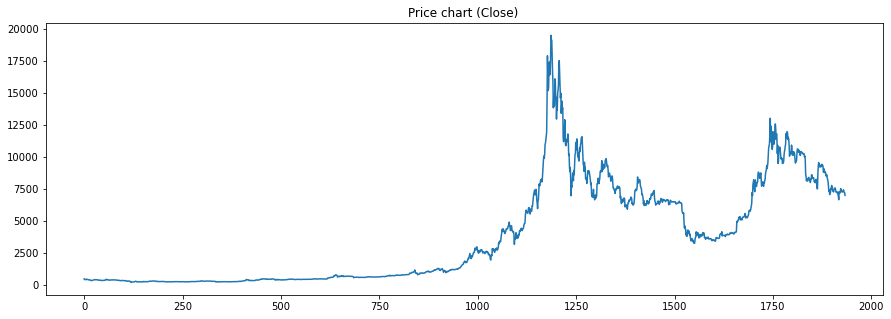

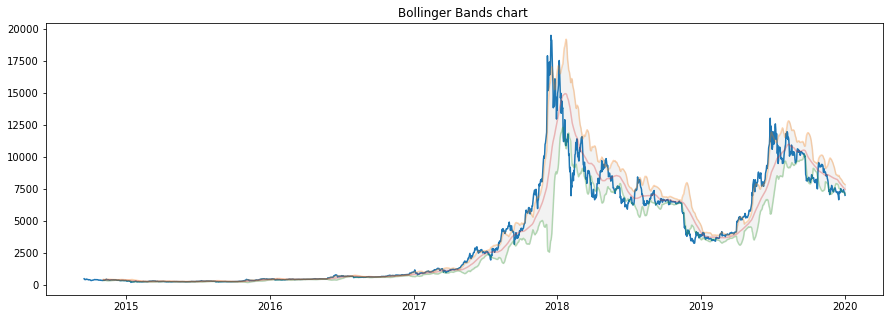

In [10]:
plt.figure(figsize=(15,5))
plt.plot( df['Close'])
plt.title('Price chart (Close) ')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ' )

plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['upper'], alpha=0.3)
plt.plot(df['Date'], df['lower'], alpha=0.3)
plt.plot(df['Date'], df['50 SMA'], alpha=0.3)
plt.fill_between(df['Date'], df['upper'], df['lower'], color='grey', alpha=0.1)

plt.show()

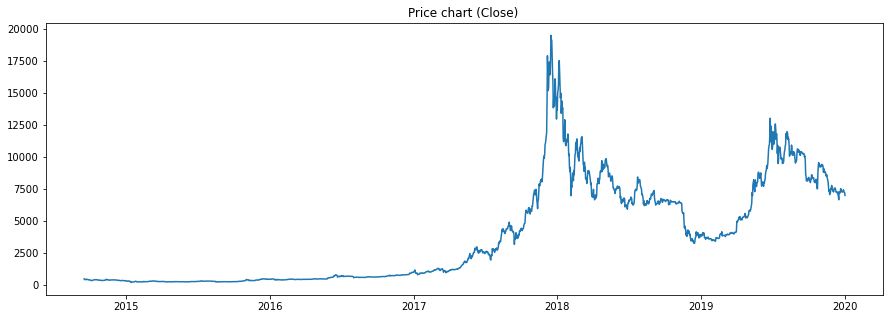

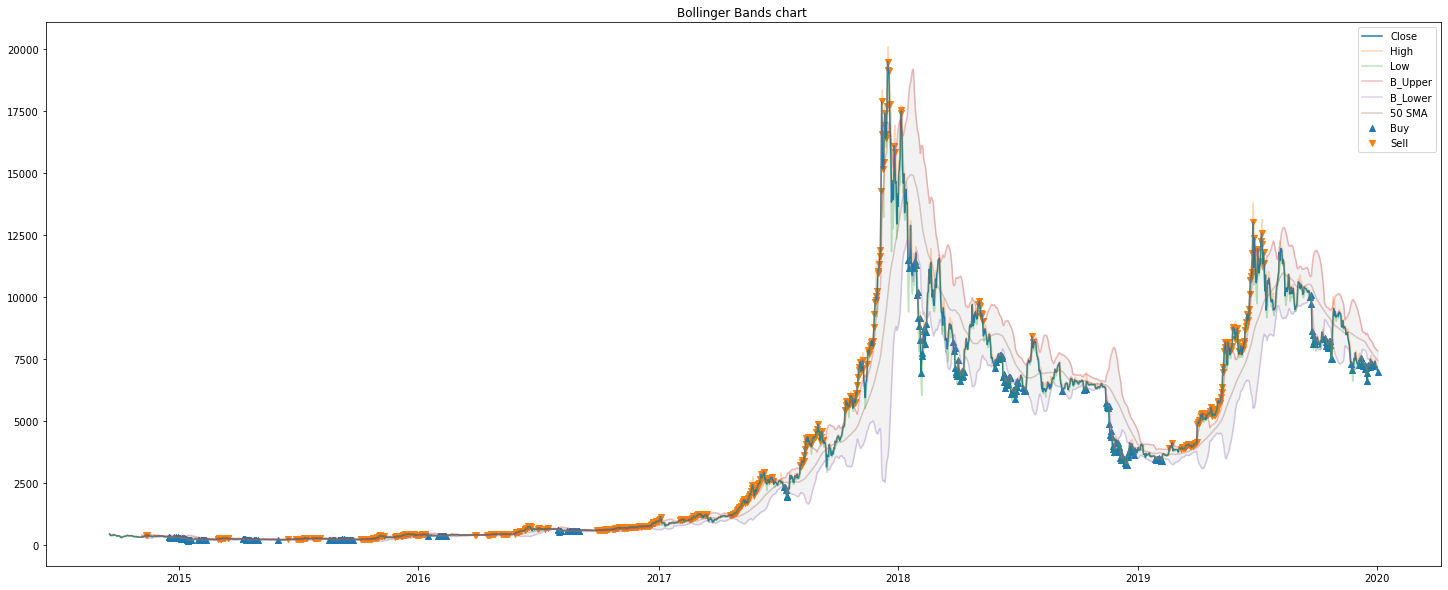

In [11]:
    
    plt.figure(figsize=(15,5))
    plt.plot(df['Date'], df['Close'])
    plt.title('Price chart (Close) ')
    plt.show()

    # plot  values and significant levels
    plt.figure(figsize=(25,10))
    plt.title('Bollinger Bands chart ')
    plt.plot(df['Date'], df['Close'], label='Close')

    plt.plot(df['Date'], df['High'], label='High', alpha=0.3)
    plt.plot(df['Date'], df['Low'], label='Low', alpha=0.3)

    plt.plot(df['Date'], df['upper'], label='B_Upper', alpha=0.3)
    plt.plot(df['Date'], df['lower'], label='B_Lower', alpha=0.3)
    plt.plot(df['Date'], df['50 SMA'], label='50 SMA', alpha=0.3)
    plt.fill_between(df['Date'], df['upper'], df['lower'], color='grey', alpha=0.1)

    plt.scatter(df['Date'], df['buy'], label='Buy', marker='^')
    plt.scatter(df['Date'], df['sell'], label='Sell', marker='v')

    plt.legend()

    plt.show()